<a href="https://colab.research.google.com/github/siramil/ML-SandalShoeBoot/blob/main/Sandal_Shoe_Boot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

**dataset** : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/code

**download datasheet:**

In [1]:
!wget --no-check-certificate \
  https://github.com/siramil/ML-SandalShoeBoot/raw/main/ShoeSandalBoot.zip \
  -O /tmp/ShoeSandalBoot.zip

--2023-05-29 14:49:15--  https://github.com/siramil/ML-SandalShoeBoot/raw/main/ShoeSandalBoot.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/siramil/ML-SandalShoeBoot/main/ShoeSandalBoot.zip [following]
--2023-05-29 14:49:15--  https://raw.githubusercontent.com/siramil/ML-SandalShoeBoot/main/ShoeSandalBoot.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49260786 (47M) [application/zip]
Saving to: ‘/tmp/ShoeSandalBoot.zip’

/tmp/ShoeSandalBoot 100%[===================>]  46.98M   259MB/s    in 0.2s    

2023-05-29 14:49:17 (259 MB/s) - ‘/tmp/ShoeSandalBoot.zip’ saved [49260786/492607

In [2]:
import os
import zipfile
import tensorflow as tf

local_zip = '/tmp/ShoeSandalBoot.zip'
zip_ref  = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


In [4]:
from keras_preprocessing.image import ImageDataGenerator
base_dir = '/tmp/Shoe vs Sandal vs Boot Dataset'
image_gen = ImageDataGenerator(
    rescale= 1./255,                                                              # normalisasi data
    rotation_range = 20 ,                                                        # skenario image rotation 360 degree
    width_shift_range = 0.2,                                                      # "" pelebaran gambar sampai 0.2x
    height_shift_range = 0.2,                                                     # "" peninggian gambar sampai 0.2x
    zoom_range = 0.2,                                                             # "" zoom gambar sampai 0.2x
    horizontal_flip=True,                                                         # '' putar balik gambar secara horizontal
    fill_mode = 'nearest',                                                        # fill empty pixel with nearest pixel's value
    validation_split = 0.2                                                        # bagi data training 80%, validasi 20%

)              

In [5]:
train_generator = image_gen.flow_from_directory (        
  base_dir,                                              
  target_size = (150,150),                         
  class_mode='categorical',
  batch_size = 64,                                      
  shuffle = True,                                       
  subset = 'training'                                   
)

valid_generator = image_gen.flow_from_directory (        
  base_dir,                                              
  target_size = (150,150),                                         
  class_mode='categorical',  
  batch_size = 64,                              
  shuffle = True,                                                              
  subset = 'validation'                                 
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [6]:
base_dir_shoe = os.path.join(base_dir, 'Shoe')
base_dir_sandal = os.path.join(base_dir, 'Sandal')
base_dir_boot = os.path.join(base_dir, 'Boot')

list_dir_shoe = os.listdir(base_dir_shoe)
list_dir_sandal = os.listdir(base_dir_sandal)
list_dir_boot = os.listdir(base_dir_boot)
# Deletes all non-image files (there are two .db files bundled into the dataset)
!find //tmp/Shoe vs Sandal vs Boot Dataset/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(len(list_dir_shoe))
print(len(list_dir_sandal))
print(len(list_dir_boot))

find: ‘//tmp/Shoe’: No such file or directory
find: ‘vs’: No such file or directory
find: ‘Sandal’: No such file or directory
find: ‘vs’: No such file or directory
find: ‘Boot’: No such file or directory
find: ‘Dataset/’: No such file or directory
5000
5000
5000


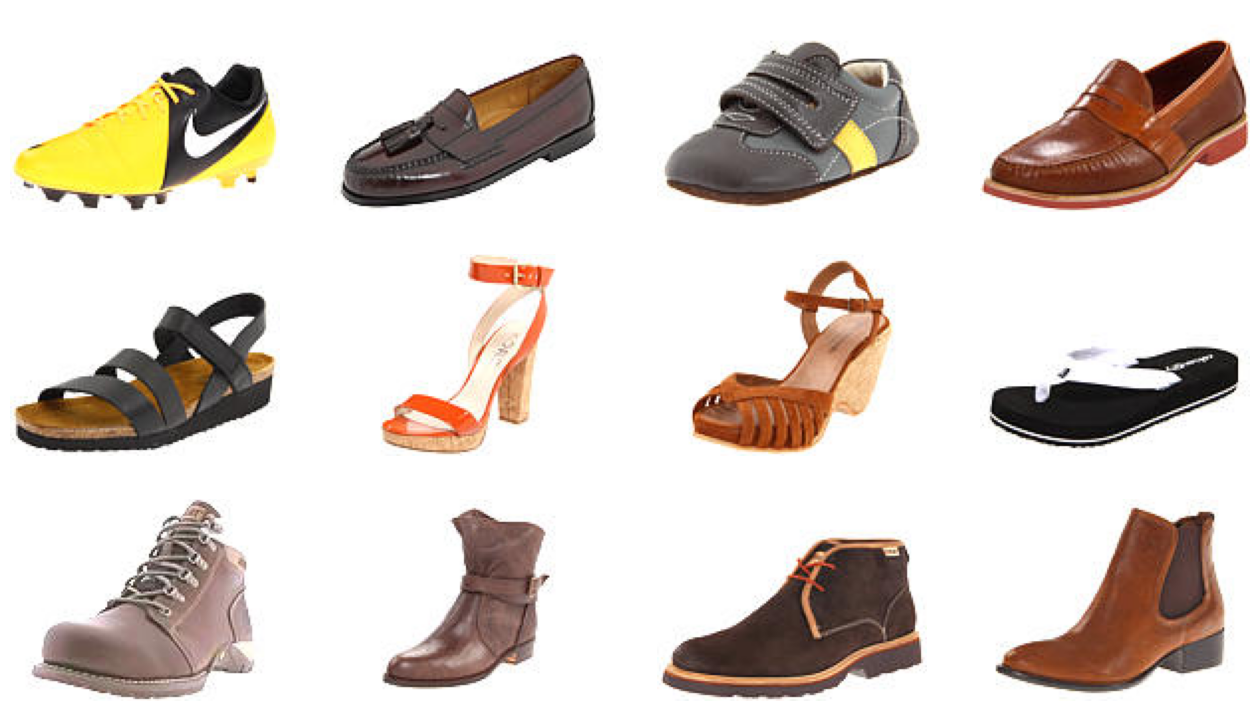

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncolomn = 4

pic_index = 0           # index awal untuk literasi gambar

fig = plt.gcf()
fig.set_size_inches(ncolomn * 4, nrows * 3)           # mengatur gambar output matplotlib dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                  # index tambah bertambah 4 setiap baris

shoe_image = [os.path.join(base_dir_shoe, fname)
                  for fname in list_dir_shoe[pic_index-4:pic_index]]
sandal_image = [os.path.join(base_dir_sandal, fname)
                  for fname in list_dir_sandal[pic_index-4:pic_index]]
boot_image = [os.path.join(base_dir_boot, fname)
                  for fname in list_dir_boot[pic_index-4:pic_index]]

for i, img_path in enumerate(shoe_image+sandal_image+boot_image) :
  sp = plt.subplot(nrows, ncolomn, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([                                              
                                                                                  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),                                           

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),                                          

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                        
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(150, (3,3), activation='relu'),                        
    tf.keras.layers.MaxPooling2D(2,2),                                            
    tf.keras.layers.Dropout(0.5),   

    tf.keras.layers.Flatten(),                                                    
                                                     
    tf.keras.layers.Dense(64, activation='relu'),                               
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])                              # Menampilkan akurasi model training

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [11]:
history = model.fit(
      train_generator,                                                          # data training hasil image generator diatas
      epochs=500,                                                               # tambahkan epoch(jumlah perulangan komputasi) jika akurasi model belum optimal
      validation_data=(valid_generator),                                        # menampilkan akurasi pengujian data validasi
      steps_per_epoch= 30,
      callbacks=[callbacks]
      )

Epoch 1/120
30/30 [==============================] - 44s 933ms/step - loss: 1.1371 - accuracy: 0.3427 - val_loss: 1.0975 - val_accuracy: 0.3350
Epoch 2/120
30/30 [==============================] - 31s 1s/step - loss: 1.0728 - accuracy: 0.4523 - val_loss: 1.0261 - val_accuracy: 0.5307
Epoch 3/120
30/30 [==============================] - 27s 903ms/step - loss: 0.9872 - accuracy: 0.5021 - val_loss: 0.9396 - val_accuracy: 0.5997
Epoch 4/120
30/30 [==============================] - 27s 904ms/step - loss: 0.9242 - accuracy: 0.5510 - val_loss: 0.9537 - val_accuracy: 0.5560
Epoch 5/120
30/30 [==============================] - 31s 1s/step - loss: 0.9131 - accuracy: 0.5604 - val_loss: 0.8457 - val_accuracy: 0.6293
Epoch 6/120
30/30 [==============================] - 26s 899ms/step - loss: 0.8817 - accuracy: 0.5844 - val_loss: 0.7887 - val_accuracy: 0.6473
Epoch 7/120
30/30 [==============================] - 31s 1s/step - loss: 0.7830 - accuracy: 0.6182 - val_loss: 0.7765 - val_accuracy: 0.6363
E

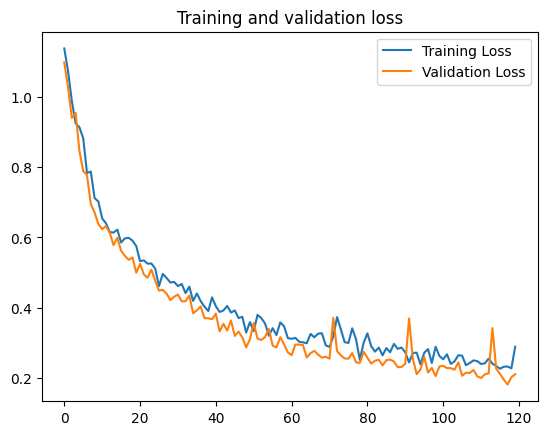

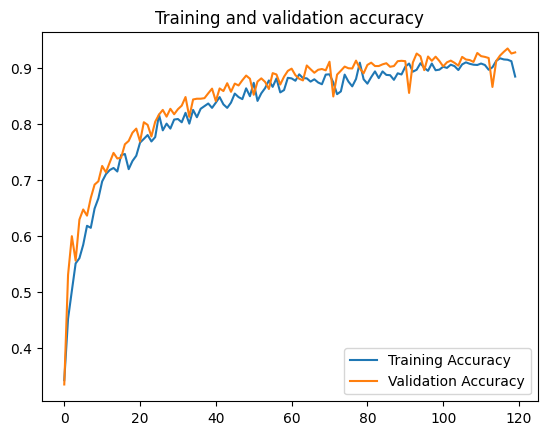

In [12]:
import matplotlib.pyplot as plt


# Plot training and validation loss values over time
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# Plot training and validation accuracies over time
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Saving boot.jpeg to boot.jpeg
1/1 [==============================] - 0s 19ms/step
boot.jpeg
[[1. 0. 0.]]
Boot


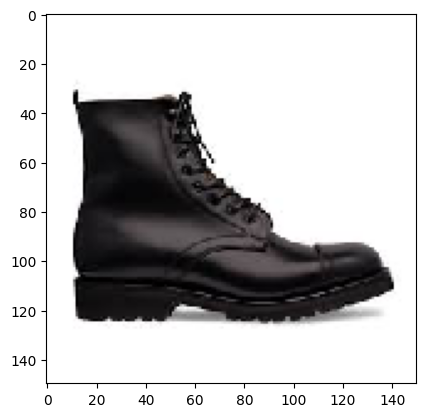

In [47]:
import numpy as np             
from google.colab import files   
from tensorflow.keras.preprocessing import image  
import matplotlib.pyplot as plt  

     
                                      
%matplotlib inline      
                                    
uploaded = files.upload()                                                         # mengunggah gambar yang dikenali model
                                        
for fn in uploaded.keys():
  path = fn                                                            
  img = image.load_img(path, target_size=(150,150))                               # mengubah ukuran gambar menjadi 150x150 piksel

  imgplot = plt.imshow(img)                                                       # menampilkan gambar yang diunggah             
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print('Boot')
  elif classes[0][1] == 1:
    print('Sandal')
  elif classes[0][2] == 1:
    print('Shoe')
  else:
    print('Not Shoes or Sandal or Boot')